# Pemrograman Python

## Tugas 3: Manipulasi dan Visualisasi Data

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi tugas3_NIM.ipynb.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Terdapat lima _packages_ yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

***Jangan mengubah isi kolom ini***

** 1. Analisis dan Manipulasi Data (/25 poin) **

1.1 (/2 poin)

1.2 (/2 poin)

1.3 (/2 poin)

1.4 (/4 poin)

1.5 (/3 poin)

1.6 (/5 poin)

1.7.a (/2 poin)

1.7.b (/3 poin)

1.7.c (/2 poin)

** 2. Visualisasi Data (/25 poin) **

2.1.a (/3 poin)

2.1.b (/7 poin)

2.2 (/2 poin)

2.3 (/2 poin)

2.4.a (/2 poin)

2.4.b (/6 poin)

2.5 (/3 poin)

**NIM:0102514015**

**Nilai akhir: XX/50**

### Deskripsi Dataset

Pada tugas kali ini, Anda akan mencoba menganalisis dan memanipulasi Titanic dataset. Titanic dataset adalah data penumpang kapal RMS Titanic yang mengalami kecelakaan pada tahun 1912. Data ini berisi informasi tentang penumpang kapal tersebut. Tugas Anda adalah mencoba menggambarkan beberapa grafik yang dapat membantu Anda dalam memahami karakteristik dataset tersebut.

Selain itu, Anda juga akan belajar untuk memanipulasi data dengan melakukan transformasi terhadap _dataframe_ dengan menggunakan Pandas dan NumPy. Oleh karena itu, Anda diharapkan menguasai beberapa operasi mendasar pada _dataframe_ yang dicontohkan dalam tugas ini. Anda bisa melihat deskripsi lengkapnya di [sini](http://archive.ics.uci.edu/ml/datasets/Iris?ref=datanews.io).

Dalam proses _data mining_, ada beberapa istilah yang umum digunakan. Contohnya, kita menyebut variabel yang ada dalam dataset sebagai "atribut" atau "fitur", sementara variabel yang ingin diprediksi sebagai "kelas" atau "kategori". Dalam dataset Iris, atribut berarti `sex, age, fare, embarked`, dsb.; sementara kelas berarti variabel `survived`. Di sisi lain, objek, _data point_, atau _instance_ berarti satu baris dalam dataset.

### Mengimpor Modul dan Dataset

In [374]:
from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm, multivariate_normal
%matplotlib inline

RANDOM_STATE = 1337

In [404]:
df = sns.load_dataset('titanic')

## 1. Analisis dan Manipulasi Data (25 poin)

### Soal 1.1 (2 poin)

Laporkan deskripsi dari Titanic dataset dengan menggunakan metode dari Pandas!

In [405]:
# kode Anda di sini
df.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


### Soal 1.2 (2 poin)

Berapa jumlah masing-masing kelas dari dataset ini (i.e. berapa yang selamat dan berapa yang meninggal)?

In [377]:
# kode Anda di sini
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

### Soal 1.3 (2 poin)

Berapa jumlah objek dengan nilai `age` yang hilang dalam dataset ini?

In [378]:
# kode Anda di sini
df['age'].isnull().sum()

177

### Soal 1.4 (4 poin)

Kelompokkan data berdasarkan `survived`, lalu hitung nilai rata-rata dan standar deviasi untuk `age` dan `fare`!

In [379]:
# kode Anda di sini

print(df.groupby('survived')['age','fare'].mean())
print(df.groupby('survived')['age','fare'].std())

                age       fare
survived                      
0         30.626179  22.117887
1         28.343690  48.395408
                age       fare
survived                      
0         14.172110  31.388207
1         14.950952  66.596998


### Soal 1.5 (3 poin)

Terdapat beberapa atribut yang berulang atau sudah merupakan hasil olahan dalam dataset ini. Oleh karena itu, cobalah Anda buang atribut-atribut berikut:

- `class`
- `who`
- `adult_male`
- `deck`
- `embark_town`
- `alive`
- `alone`

In [380]:
# kode Anda di sini
print(df.columns)
del df['class'], df['who'],df['adult_male'],df['deck'],df['embark_town'],df['alive'],df['alone']
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')


### Soal 1.6 (5 poin)

Terkadang, data yang kita terima memiliki jangkauan yang berbeda-beda di tiap atributnya. Buatlah dua atribut baru dari `age` dan `fare` dalam bentuk yang ternormalisasi. Nilai normal dapat dihitung sebagai:
$$
x'_i = \frac{x_i - \text{min}(\mathbf{x})}{\text{max}(\mathbf{x}) - \text{min}(\mathbf{x})}
$$
dengan $\mathbf{x}$ adalah vektor dari nilai suatu atribut dan $x_i$ adalah satu _instance_/objek yang ingin kita normalisasi. Simpan nilai `age` dan `fare` yang baru ini sebagai `normalised_age` dan `normalised_fare` dalam variabel `df`.

_Catatan: Abaikan nilai `age` yang hilang!_

In [381]:
# kode Anda di sini
df['normalised_age'] = (df.age-df.age.min())/(df.age.max()-df.age.min())
df['normalised_fare'] = (df.fare-df.fare.min())/(df.fare.max()-df.fare.min())
print(df.normalised_age)
print(df.normalised_fare)

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
5           NaN
6      0.673285
7      0.019854
8      0.334004
9      0.170646
10     0.044986
11     0.723549
12     0.246042
13     0.484795
14     0.170646
15     0.685851
16     0.019854
17          NaN
18     0.384267
19          NaN
20     0.434531
21     0.421965
22     0.183212
23     0.346569
24     0.095250
25     0.472229
26          NaN
27     0.233476
28          NaN
29          NaN
         ...   
861    0.258608
862    0.597889
863         NaN
864    0.296306
865    0.522493
866    0.334004
867    0.384267
868         NaN
869    0.044986
870    0.321438
871    0.585323
872    0.409399
873    0.585323
874    0.346569
875    0.183212
876    0.246042
877    0.233476
878         NaN
879    0.698417
880    0.308872
881    0.409399
882    0.271174
883    0.346569
884    0.308872
885    0.484795
886    0.334004
887    0.233476
888         NaN
889    0.321438
890    0.396833
Name: normalised_age, dt

### Soal 1.7.a (2 poin)

Sekarang, kita ingin melihat apakah ada korelasi antara usia penumpang dengan harga tiketnya. Hipotesisnya, seharusnya orang dewasa akan membayar lebih mahal dibandingkan anak kecil. Untuk membuktikan korelasi ini, kita bisa menggunakan fungsi dari NumPy. Namun, beberapa nilai `age` ternyata hilang (lihat kembali soal 1.3).

Tugas Anda adalah: ganti nilai yang hilang ini! Salah satu caranya adalah dengan nilai median dari `age` yang tersedia, lalu menggunakan nilai tersebut sebagai pengganti nilai yang hilang.

In [382]:
# kode Anda di sini
df['age'].fillna(df['age'].median(), inplace=True)
df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      28.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     28.0
18     31.0
19     28.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     28.0
27     19.0
28     28.0
29     28.0
       ... 
861    21.0
862    48.0
863    28.0
864    24.0
865    42.0
866    27.0
867    31.0
868    28.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    28.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, dtype: float64

### Soal 1.7.b (2 poin)

Setelah nilai `age` yang kosong tersebut diisi. Anda bisa menghitung nilai korelasinya dengan atribut `fare` menggunakan fungsi `numpy.corrcoef`. Perhatikan bahwa Anda mungkin perlu melakukan _transpose_ terhadap irisan dari DataFrame yang Anda gunakan. Cetaklah hasil dari fungsi tersebut!

In [383]:
# kode Anda di sini
corr = np.corrcoef(df.age, df.fare)
corr

array([[ 1.        ,  0.09668842],
       [ 0.09668842,  1.        ]])

### Soal 1.7.c (3 poin)

Lihat elemen ke $(1,2)$ atau $(2,1)$ dari matriks tersebut (catatan: secara matematis, indeks dimulai dari satu; dimensi matriks yang dihasilkan seharusnya $2 \times 2$), berapa nilainya?

Pembagian kategori nilai korelasi terkadang dilihat sebagai berikut ([sumber](http://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)):

- Exactly –1. A perfect downhill (negative) linear relationship
- –0.70. A strong downhill (negative) linear relationship
- –0.50. A moderate downhill (negative) relationship
- –0.30. A weak downhill (negative) linear relationship
- 0 No linear relationship
- +0.30. A weak uphill (positive) linear relationship
- +0.50. A moderate uphill (positive) relationship
- +0.70. A strong uphill (positive) linear relationship
- Exactly +1. A perfect uphill (positive) linear relationship

Buatlah fungsi yang membuat pembagian tersebut, lalu evaluasi seberapa kuat korelasi antara `age` dengan `fare`?

In [384]:
# kode Anda di sini
def category_corr_value(cor):
    if cor >= -1 and cor <-0.7 : a = 'A perfect downhill (negative) linear relationship'
    elif cor >=-0.7 and cor <-0.5: a = 'A strong downhill (negative) linear relationship'
    elif cor >=-0.5 and cor <-0.3: a = 'A moderate downhill (negative) linear relationship'
    elif cor >=-0.3 and cor <0: a = 'A weak downhill (negative) linear relationship'
    elif cor == 0 : a = 'No linear relationship'
    elif cor >0 and cor <=0.3: a = 'A weak downhill (positive) linear relationship'
    elif cor >0.3 and cor <=0.5: a = 'A moderate downhill (positive) linear relationship'
    elif cor >0.5 and cor <=0.7: a = 'A Strong downhill (positive) linear relationship'
    elif cor >0.7 and cor <=1: a = 'A perfect uphill (positive) linear relationship'
    return a    
        
category_corr_value(corr[0,1])

'A weak downhill (positive) linear relationship'

## 2. Visualisasi Data (25 poin)

### Soal 2.1.a (3 poin)

Untuk memperjelas hubungannya secara visual, gambarkan _scatter plot_ dengan sumbu $x$ adalah `age` dan sumbu $y$ adalah `fare`! Gunakan metode `jointplot` dari pustaka `seaborn`.

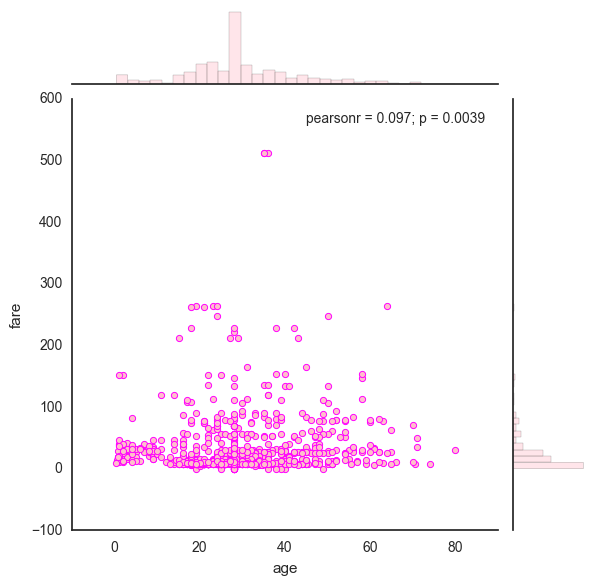

In [385]:
# kode Anda di sini
sns.set(style='white', color_codes=True)
sns.jointplot('age', 'fare', df, color = 'pink', linewidth=0.7, edgecolors='magenta')

### Soal 2.1.b (7 poin)

Gambarkan kembali _scatter plot_ tersebut, tapi kali ini cocokkan distribusi _bivariate Gaussian_ untuk menggambarkan _contour plot_ pada bidang yang sama!

_Petunjuk: Hasil akhirnya akan seperti grafik [ini](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb#Gaussian-Naive-Bayes), tetapi Anda tidak perlu membaginya per kelas._

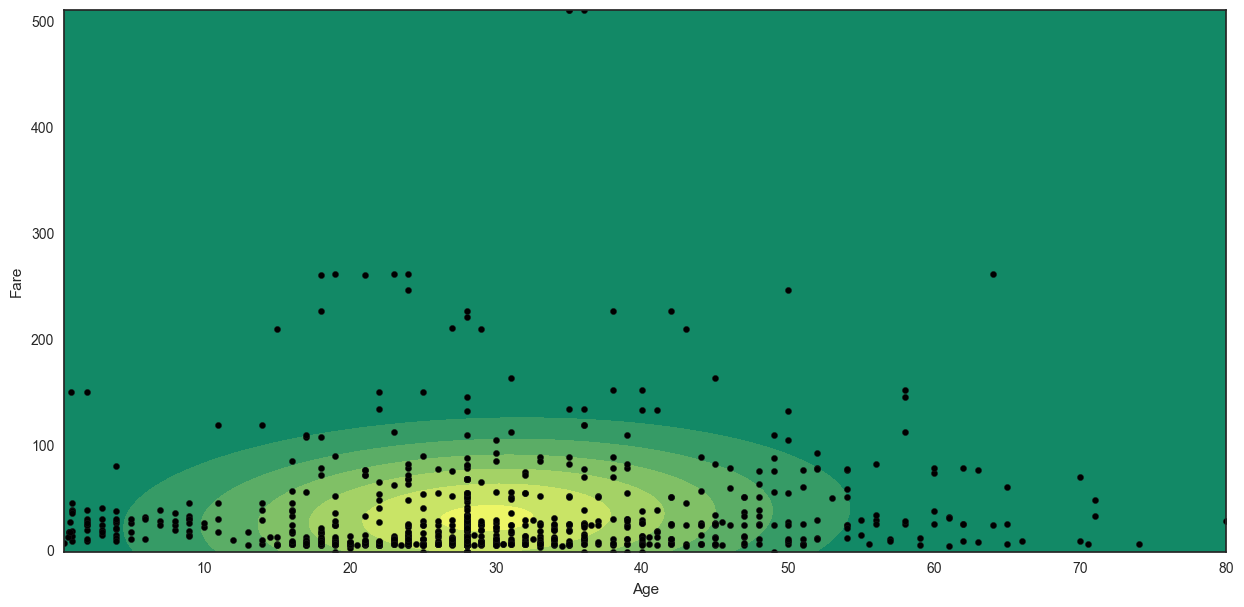

In [386]:
# kode Anda di sini

c_mean = df.age.mean()
l_mean = df.fare.mean()
covariance_matrix =  np.cov(df[['age','fare']].T)
c = np.linspace(df.age.min(), df.age.max(), 500)
l = np.linspace(df.fare.min(), df.fare.max(), 500)

x1, x2 = np.meshgrid(c, l)
rv = multivariate_normal([c_mean, l_mean], covariance_matrix)

pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1
pos[:, :, 1] = x2

fig, ax = plt.subplots(figsize=(15,7))
ax.contourf(x1, x2, rv.pdf(pos), cmap='summer')
ax.scatter(df.age, df.fare, c='black')
ax.set_xlim([df.age.min(), df.age.max()])
ax.set_ylim([df.fare.min(), df.fare.max()])
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.show()

### Soal 2.2 (2 poin)

Gambarkan _barplot_ dari kelas tiket (`pclass`) untuk mengetahui dengan lebih baik distribusi atribut tersebut!

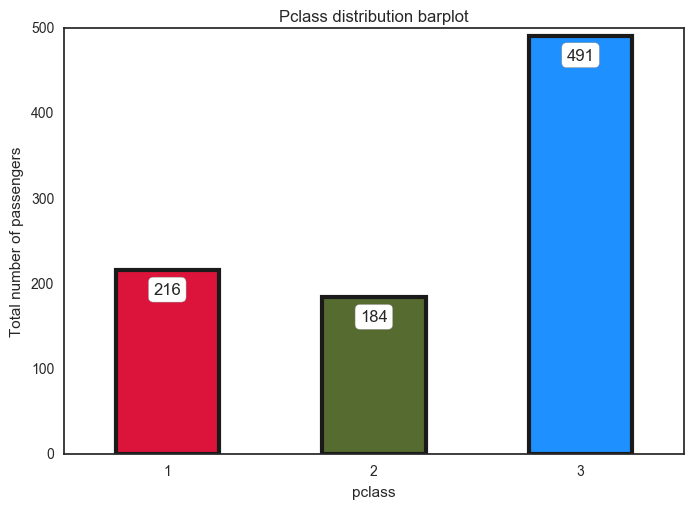

In [387]:
# kode Anda di sini

barplot=df.groupby('pclass').survived.count()
plt.title('Pclass distribution barplot')
x_pos = np.arange(len(barplot))
bar_ = plt.bar(x_pos+0.25, barplot, 0.5, color=['crimson', 'darkolivegreen','dodgerblue'], linewidth=3)

for x,y in zip(np.arange(3), barplot):
    plt.text(x+0.5,y-14, '%d' % y, ha='center', va='top',
    bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.5'))

plt.ylabel('Total number of passengers')
plt.xlabel('pclass')
plt.xticks(x_pos+0.5, (1,2,3))
plt.show()


### Soal 2.3 (2 poin)

Anda ingin mengetahui dengan lebih jelas, apakah perempuan lebih didahulukan keselamatannya dibandingkan laki-laki. Untuk itu, gambarkan _bar plot_ yang dibagi berdasarkan status `survived`-nya dan bagi lagi masing-masing statusnya berdasarkan atribut `sex`.

_Petunjuk: Seharusnya Anda akan menghasilkan empat bars: survived male, survived female, dead male, dead female._

sex       female  male
survived              
0             81   468
1            233   109


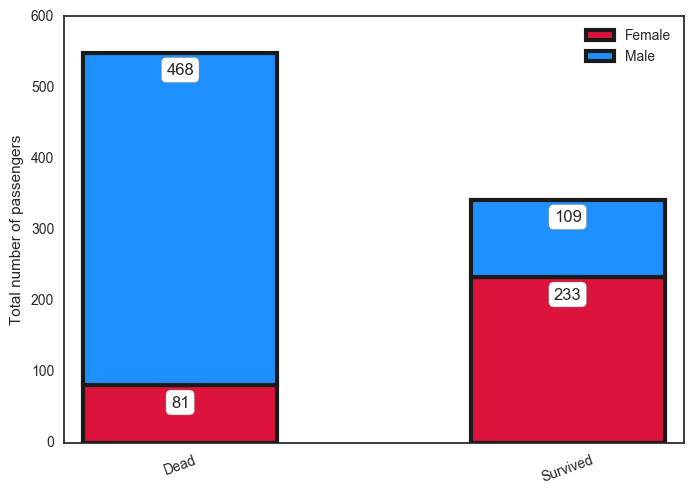

In [388]:
# kode Anda di sini

#Asumsi 0 : Dead dan 1 : Survived
table = pd.pivot_table(data=df, values = 'pclass', index='survived', columns='sex', aggfunc='count')
print(table)

bar_1 = table['female']
bar_2 = table['male']

x_pos = np.arange(len(bar_1))
first_bar = plt.bar(x_pos+0.25, bar_1, 0.5, color='crimson', linewidth=3, label='Female')
for x,y in zip(np.arange(2),bar_1):
    plt.text(x+0.5,y-14, '%d' % y, ha='center', va='top',
    bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.5'))
                    
second_bar = plt.bar(x_pos+0.25, bar_2, 0.5, color='dodgerblue', bottom=bar_1, linewidth=3, label='Male')
for x,y,z in zip(np.arange(4),bar_1,bar_2):
    plt.text(x+0.5,y+z-14, '%d' % z, ha='center', va='top',
    bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.5'))


plt.ylabel('Total number of passengers')
plt.xticks(x_pos+0.5, ('Dead','Survived'), rotation=20)
plt.legend(loc='best')
plt.show()

### Soal 2.4.a (2 poin)

Kita ingin melihat korelasi dengan lebih jelas melalui bantuan visualisasi. Namun, ubahlah terlebih dahulu nilai `sex` menjadi 1 untuk _male_ dan 0 untuk _female_.

In [389]:
# kode Anda di sini
df.sex = df.sex.map({'male':1, 'female':0}).astype('int')
df.sex

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Name: sex, dtype: int32

### Soal 2.4.b (6 poin)

Hitunglah nilai korelasi dari kelima variabel berikut: `survived`, `pclass`, `sex`, `age`, dan `fare`. Lalu, gambarkan _heatmap_-nya!

_Catatan: Tuliskan nilai korelasinya dalam heatmap yang dihasilkan! Jangan lupa untuk mengganti label di sumbu x dan y dengan nama atribut yang digunakan_

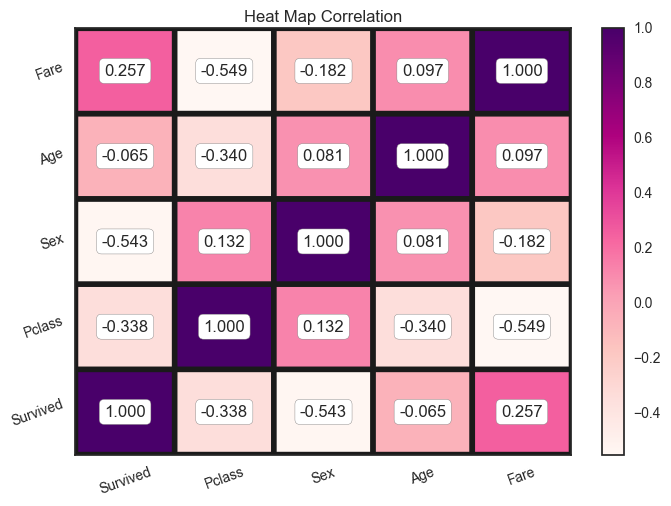

In [390]:
# kode Anda di sini
cor = np.corrcoef((df.survived, df.pclass, df.sex, df.age, df.fare))
plt.title('Heat Map Correlation')
plt.pcolor(cor, edgecolors='k', linewidths=4, cmap='RdPu')
plt.colorbar()
for (i, j), z in np.ndenumerate(cor):
    plt.text(0.5+j,0.5+i, '{:0.3f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.5'))
    
plt.xticks(np.arange(0.5,5.5), ['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], rotation=20)
plt.yticks(np.arange(0.5,5.5), ['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], rotation=20)
plt.show()

### Soal 2.5 (3 poin)

Pada bagian ini, Anda dibebaskan menggambarkan visualisasi yang menurut Anda menarik. Silakan bereksplorasi! Gambarkan dua plot atau lebih dari data yang sudah diberikan.

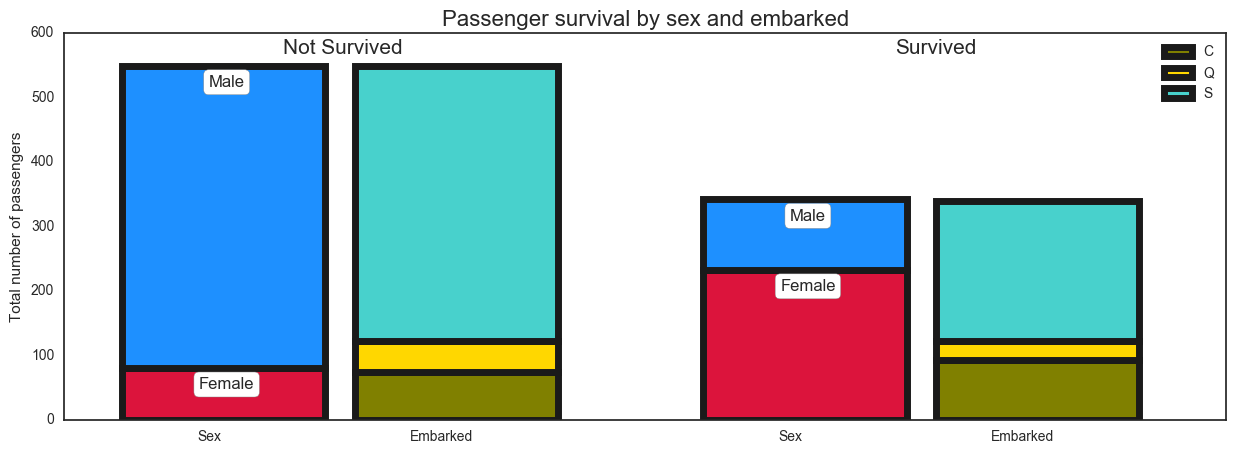

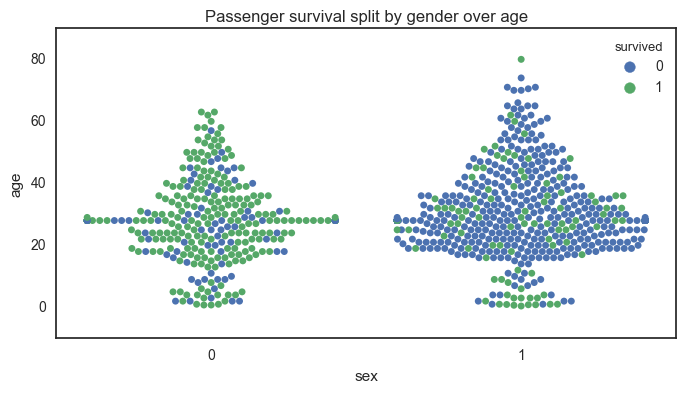

In [401]:
# koda Anda di sini

fig, ax = plt.subplots(figsize=(15,5))

table1 = pd.pivot_table(data=df, values = 'pclass', index='survived', columns='sex', aggfunc='count')
table2 = pd.pivot_table(data=df, values = 'pclass', index='survived', columns='embarked', aggfunc='count')
#print(table1, table2)

bar_11 = table1[0]
bar_21 = table1[1]
bar_12 = table2['C']
bar_22 = table2['Q']
bar_32 = table2['S']

x_pos = np.arange(len(bar_12))

plt.text(0.48,590, 'Not Survived', ha='center', va='top', size = '15')
first_bar = plt.bar(x_pos+0.5, bar_12, 0.35, color='olive', linewidth=5, label='C')                 
second_bar = plt.bar(x_pos+0.5, bar_22, 0.35, color='gold', bottom=bar_12, linewidth=5, label='Q')
third_bar = plt.bar(x_pos+0.5, bar_32, 0.35, color='mediumturquoise', bottom=bar_22+bar_12, linewidth=5, label='S')

plt.text(1.5,590, 'Survived', ha='center', va='top', size = '15')
bar_female =  plt.bar(x_pos + 0.1, bar_11, 0.35, color='crimson', linewidth=5)   
for x,y,z in zip(np.arange(2), bar_11, ['Female','Female']):
    plt.text(x+0.28,y-14, '%s' % z, ha='center', va='top',
    bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.5'))
bar_male =  plt.bar(x_pos + 0.1, bar_21, 0.35, color='dodgerblue', bottom=bar_11, linewidth=5)
for x,y,z in zip(np.arange(2), bar_11+bar_21, ['Male','Male']):
    plt.text(x+0.28,y-14, '%s' % z, ha='center', va='top',
    bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.5'))
    
plt.title('Passenger survival by sex and embarked', size=16)
plt.ylabel('Total number of passengers')
x_labels=['Sex', 'Embarked', 'Sex', 'Embarked']
ax.set_xticks([0.25,0.65,1.25,1.65])
ax.set_xticklabels(x_labels)
plt.legend(loc = 'best')
plt.show()

#visualisasi kedua diambil dari https://github.com/oneilltp18/titanic_project/blob/master/titanic_project_code.ipynb

plt.figure(figsize = (8, 4))
sns.swarmplot(x = df.sex, y = df.age, hue = df.survived, split = False)
plt.title('Passenger survival split by gender over age')
plt.show()

